# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('D:\kaggle data/train.csv')
test = pd.read_csv('D:\kaggle data/test.csv')

## train = pd.read_csv('avito-text-classification/train.csv')
## test = pd.read_csv('avito-text-classification/test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [6]:
test.isna().sum()

title          0
description    1
itemid         0
dtype: int64

In [7]:
import numpy as np

train = train.replace(np.nan, '', regex=True)

In [8]:
test = test.replace(np.nan, '', regex=True)

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [9]:
train["title&description"] = train["title"] + ' ' + train["description"]
train.head()

,title,description,Category_name,Category,title&description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [35]:
test["title&description"] = test["title"] + ' ' + test["description"]
test.head()

,title,description,itemid,title&description
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [10]:
train['Category_name'].nunique()

50

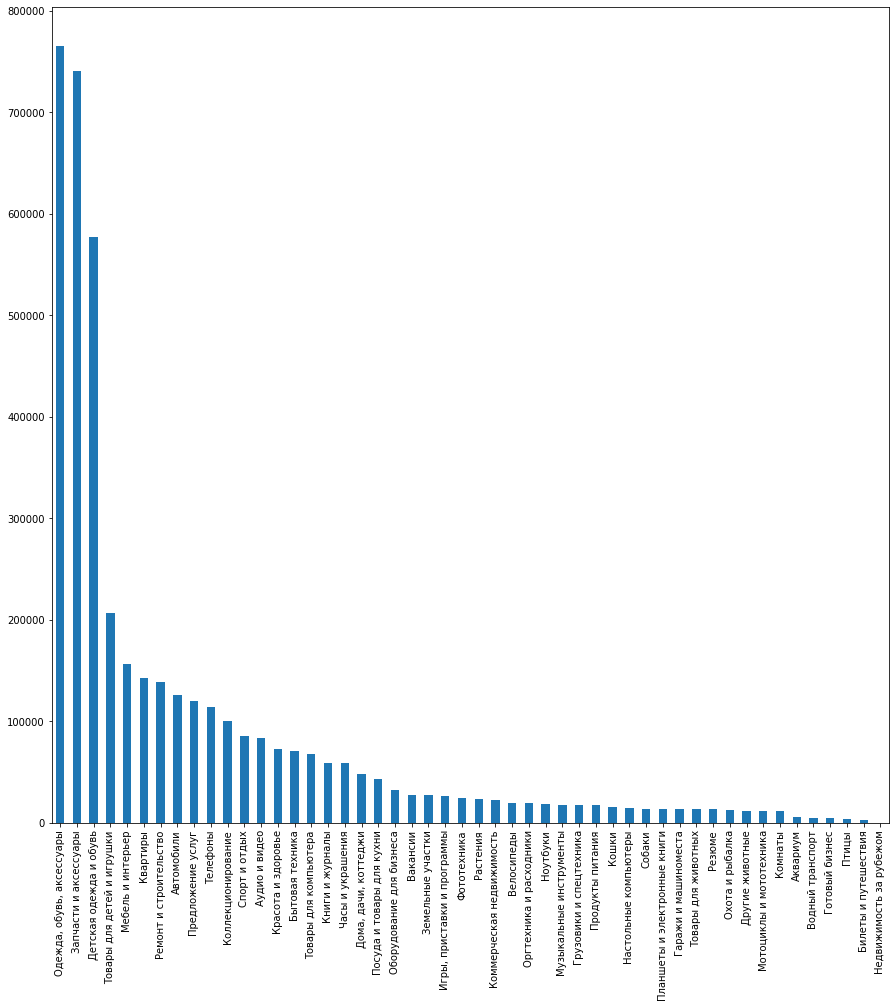

In [11]:
import matplotlib.pyplot as plt

train['Category_name'].value_counts().plot(kind='bar', figsize=(15, 15));
plt.show()

In [12]:
train['Category_name'].value_counts() / len(train['Category_name'])

Одежда, обувь, аксессуары       0.180707
Запчасти и аксессуары           0.174939
Детская одежда и обувь          0.136394
Товары для детей и игрушки      0.048775
Мебель и интерьер               0.037018
Квартиры                        0.033593
Ремонт и строительство          0.032756
Автомобили                      0.029706
Предложение услуг               0.028378
Телефоны                        0.026850
Коллекционирование              0.023761
Спорт и отдых                   0.020163
Аудио и видео                   0.019681
Красота и здоровье              0.017110
Бытовая техника                 0.016754
Товары для компьютера           0.016079
Книги и журналы                 0.013948
Часы и украшения                0.013918
Дома, дачи, коттеджи            0.011392
Посуда и товары для кухни       0.010047
Оборудование для бизнеса        0.007590
Вакансии                        0.006403
Земельные участки               0.006381
Игры, приставки и программы     0.006217
Фототехника     

Таким образом, наибольшую долю имеет класс "Одежда, обувь, аксессуары". Его доля составляет 0.180707. Наименьшую долю имеет класс "Недвижимость за рубежом". Его доля составляет 0.000039.

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?

In [14]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['title&description'])
X.shape

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [16]:
import re 
from string import punctuation

words = list(cnt_vec.vocabulary_.keys())
number_start = [i for i in words if i[0].isdigit()]
punc_start = [i for i in words if i[0] in list(punctuation)]
len_num = len(number_start)
len_punc = len(punc_start)

print('number of words that starts with number:',len_num)
print('number of words that starts with punctuation:',len_punc)

number of words that starts with number: 610944
number of words that starts with punctuation: 2043


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

def custom_tokenizer(text: str):
    text = text.lower()
    token = word_tokenize(text)
    text_noise = list(punctuation) + stopwords.words("russian")
    token = [i for i in token if i[0] not in text_noise and not i[0].isdigit()]
    stemming = SnowballStemmer("russian")
    final_text = [stemming.stem(i) for i in token]
    return final_text

In [19]:
sample = train['title&description'][0]

custom_tokenizer(sample)

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'эб',
 'мозг',
 'мотор',
 'двигател',
 'электрон',
 'блок',
 'двигател',
 'мотор',
 'для',
 'рен',
 'kangoo',
 'мега',
 'laguna',
 'лагун',
 'clio',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'делф',
 'б.у',
 'проверен',
 'гарант',
 'на',
 'запчаст',
 'предоставля',
 'гарант',
 'бол',
 'подробн',
 '—',
 'раздел',
 '«',
 '»',
 'мы',
 'дорож',
 'репутац',
 'торгу',
 'тольк',
 'легальн',
 'запчаст',
 'на',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'без',
 'пробег',
 'по',
 'росс',
 'друг',
 'регион',
 'таможен',
 'транспортн',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [42]:
train = train.sample(n = 500000, random_state = 0)
cnt_vec = CountVectorizer(tokenizer = custom_tokenizer)
X = cnt_vec.fit_transform(train["title&description"])

In [43]:
from sklearn.model_selection import train_test_split

y = train["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
SGD = SGDClassifier().fit(X_train,y_train)
y_pred = SGD.predict(X_test)
print('Accuracy for CountVectorizer:',accuracy_score(y_test, y_pred))

Accuracy for CountVectorizer: 0.79516


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer = custom_tokenizer)
X = tfidf_vec.fit_transform(train["title&description"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [25]:
SGD = SGDClassifier().fit(X_train,y_train)
y_pred = SGD.predict(X_test)
print('Accuracy for TfidfVectorizer:',accuracy_score(y_test, y_pred))
print(X.shape)

Accuracy for TfidfVectorizer: 0.76774
(500000, 435964)


Качество ухудшилось с 0.79516 до 0.76774

In [26]:
tfidf_vec = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9)
X = tfidf_vec.fit_transform(train["title&description"])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [28]:
SGD = SGDClassifier().fit(X_train,y_train)
y_pred = SGD.predict(X_test)
print('Accuracy for TfidfVectorizer with max df = 0.9:',accuracy_score(y_test, y_pred))
print(X.shape)

Accuracy for TfidfVectorizer with max df = 0.9: 0.76743
(500000, 435964)


Размер матрицы не изменился, в то время как качество немного ухудшилось, упав с 0.76774 до 0.76743.

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [29]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 30000)
X = hash_vec.fit_transform(train["title&description"])

C:\Program Files\Python39\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [32]:
SGD = SGDClassifier().fit(X_train,y_train)
y_pred = SGD.predict(X_test)
print('Accuracy for HashingVectorizer:',accuracy_score(y_test, y_pred))

Accuracy for HashingVectorizer: 0.7452


Среди всех трех способов  добился лучшего результата CountVectorizer, достигнув результата в 0.79516.

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [36]:
test_data = cnt_vec.transform(test["title&description"])

In [45]:
y_pred = SGD.predict(test_data)

In [47]:
data = {'Id':  test['itemid'],
        'Category': y_pred
        }

In [49]:
df = pd.DataFrame (data, columns = ['Id','Category'])

In [51]:
df.to_csv(r'D:\kaggle data\kaggle_answers.csv', index = False)

Так как на тренировочных данных лучше всего показал себя CountVectorizer, то и на тестовых мы будем использовать его.